In [227]:
from PIL import Image, ImageDraw, JpegImagePlugin
from matplotlib import pyplot as plt
from matplotlib import patches
from scipy import ndimage, misc
import numpy as np

In [343]:
test_image = Image.open('test.jpg')

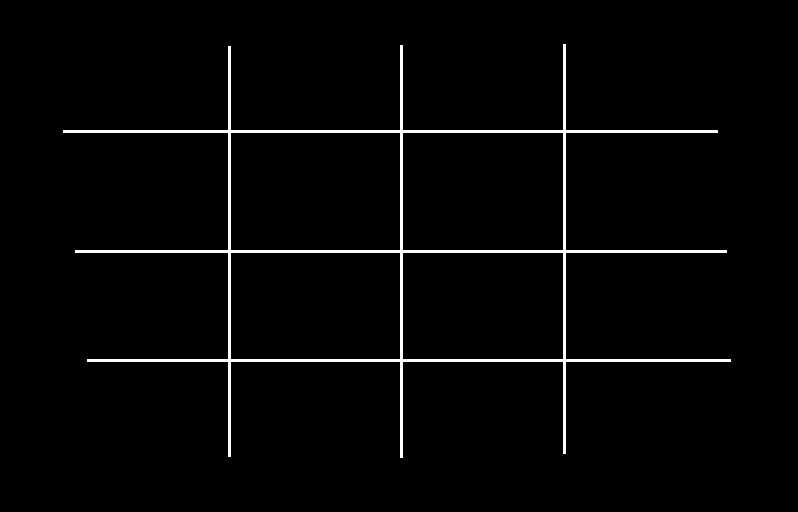

In [335]:
test_image

In [188]:
def rgb2grey(image):
    image_draw = ImageDraw.Draw(image)
    pix = image.load()
    for x in range(image.size[0]):
        for y in range(image.size[1]):
            av = int(0.2989*pix[x, y][0] + 0.5870*pix[x, y][1] + 0.1140*pix[x, y][2])
            image_draw.point((x, y), (av, av, av))
    return image

In [189]:
k = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])

In [384]:
def find_horizontal_lines(image, k, line_width, line_height, lim = 800):
    '''
        Возвращает словарь с координатами найденных горизонтальных линий формата
        {x: (start_y, stop_y)} 
    '''
    if type(image) == JpegImagePlugin.JpegImageFile:
        image = rgb2grey(image)
        image_pix = image.load()
        image_np = np.array([[image_pix[x, y][0] for x in range(image.size[0])] for y in range(image.size[1])])
    elif type(image) == np.ndarray:
        image_np = image
    res = ndimage.convolve(image_np, k, mode='constant', cval=0.0)
    
    lines = {}
    for x in range(res.shape[0]):
        same_bits_cnt = 0
        value = 0
        start_y = 0
        stop_y = 0
        stop_y = 0
        for y in range(res.shape[1]):
            if res[x, y] != 0 and abs(res[x, y]) > lim:
                same_bits_cnt += 1
                value = res[x, y]
                stop_y = y
                if same_bits_cnt == 1:
                    start_y = y
        if same_bits_cnt > line_width:
            lines[x] = (start_y, stop_y)
    lines_keys = [x for x in lines]
    
    return lines, res

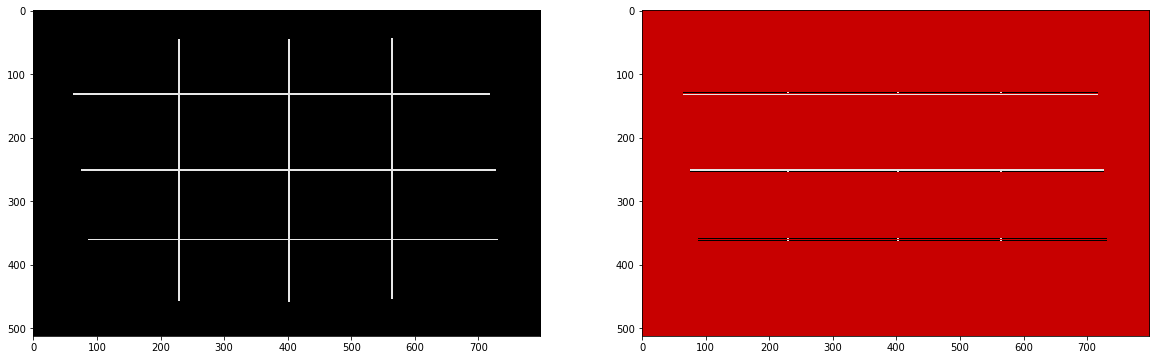

In [385]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,15))
plt.gray()
lines, res = find_horizontal_lines(test_image, k, 20, 5)
ax1.imshow(test_image)
res_im = test_image.copy()
res_im_draw = ImageDraw.Draw(res_im)
pix = res_im.load()
for x in range(res_im.size[0]):
    for y in range(res_im.size[1]):
        if lines.get(y) == None:
            res_im_draw.point((x, y), (200, 0, 0))
        else:
            if x < lines[y][0] or x > lines[y][1]:
                res_im_draw.point((x, y), (200, 0, 0))
ax2.imshow(res_im)
plt.show()

In [386]:
lines

{129: (64, 716),
 130: (64, 716),
 132: (64, 716),
 133: (64, 716),
 249: (76, 725),
 250: (76, 725),
 252: (76, 725),
 253: (76, 725),
 358: (88, 729),
 359: (88, 729),
 361: (88, 729),
 362: (88, 729)}